In [1]:
import pandas as pd
import numpy as np
import tqdm
from sklearn.metrics import mean_squared_error
from statsmodels.tsa.stattools import adfuller
import statsmodels.api as sm
import statsmodels.tsa.api as smt
from statsmodels.tsa.stattools import adfuller
import matplotlib.pyplot as plt
from scipy.stats import boxcox
from math import sqrt

import matplotlib.pyplot as plt
%matplotlib inline

from arch import arch_model

In [2]:
def test_stationarity(timeseries):
    print('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic', 'p-value', '#Lags Used', 'Number of Observations Used'])
    for [key, value] in dftest[4].items():
        dfoutput['Critical Value (%s)' % key] = value
    print(dfoutput)
    

In [3]:
def tsplot(y, lags=None, figsize=(14, 8), style='bmh'):
    test_stationarity(y)
    if not isinstance(y, pd.Series):
        y = pd.Series(y)
    with plt.style.context(style):
        plt.figure(figsize=figsize)
        layout = (5, 1)
        ts_ax = plt.subplot2grid(layout, (0, 0), rowspan=2)
        acf_ax = plt.subplot2grid(layout, (2, 0))
        pacf_ax = plt.subplot2grid(layout, (3, 0))
        qq_ax = plt.subplot2grid(layout, (4, 0))

        y.plot(ax=ts_ax, color='blue', label='Or')
        ts_ax.set_title('Original')

        smt.graphics.plot_acf(y, lags=lags, ax=acf_ax, alpha=0.05)
        smt.graphics.plot_pacf(y, lags=lags, ax=pacf_ax, alpha=0.05)
        sm.qqplot(y, line='s', ax=qq_ax)
        
        plt.tight_layout()
    return

#### Выбрал ряд индекса dj, годовой цикл - 52 недели. на выходе, судя по p-value получился стационарный временной ряд. 

Results of Dickey-Fuller Test:
Test Statistic                  -4.933719
p-value                          0.000030
#Lags Used                       5.000000
Number of Observations Used    103.000000
Critical Value (1%)             -3.495493
Critical Value (5%)             -2.890037
Critical Value (10%)            -2.581971
dtype: float64


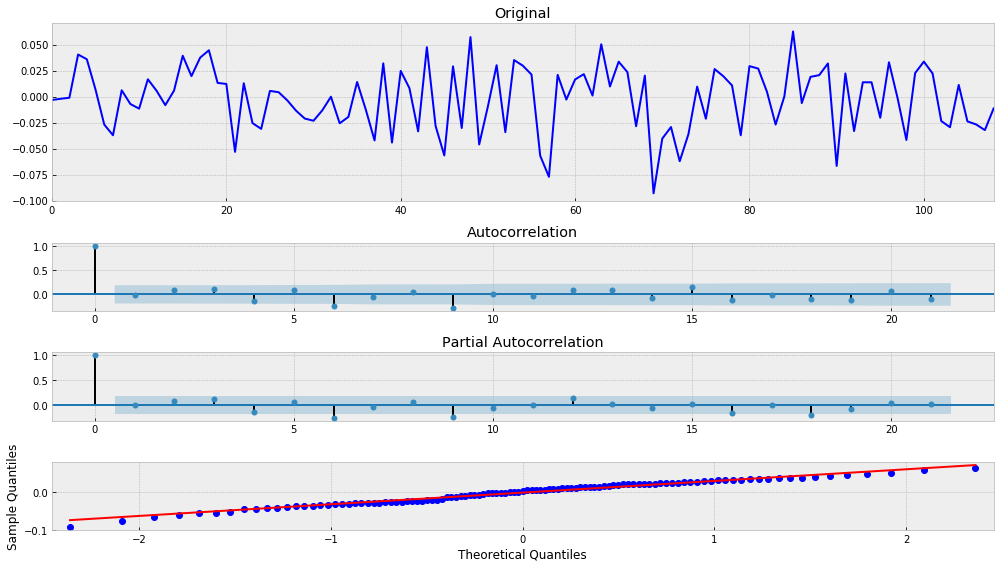

In [4]:
series = pd.read_csv('Series/weekly-closings-of-the-dowjones.csv')['Close']
series = boxcox(series, 0)
series = series[52:] - series[:-52]
series = series[1:] - series[:-1]
tsplot(series)

In [5]:
def _get_best_model(TS):
    best_aic = np.inf 
    best_order = None
    best_mdl = None

    for i in range(5):
        for d in range(5):
            for j in range(5):
                try:
                    tmp_mdl = smt.ARIMA(TS, order=(i,d,j)).fit(
                        method='mle', trend='nc'
                    )
                    tmp_aic = tmp_mdl.aic
                    if tmp_aic < best_aic:
                        best_aic = tmp_aic
                        best_order = (i, d, j)
                        best_mdl = tmp_mdl
                except: continue
    print('aic: {:6.5f} | order: {}'.format(best_aic, best_order))                    
    return best_aic, best_order, best_mdl

aic, order, mdl = _get_best_model(series)

/home/levprilutsky/anaconda3/lib/python3.7/site-packages/statsmodels/base/model.py:492: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
/home/levprilutsky/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/tsatools.py:668: RuntimeWarning: overflow encountered in exp
  newparams = ((1-np.exp(-params))/(1+np.exp(-params))).copy()
/home/levprilutsky/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/tsatools.py:668: RuntimeWarning: invalid value encountered in true_divide
  newparams = ((1-np.exp(-params))/(1+np.exp(-params))).copy()
/home/levprilutsky/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/tsatools.py:669: RuntimeWarning: overflow encountered in exp
  tmp = ((1-np.exp(-params))/(1+np.exp(-params))).copy()
/home/levprilutsky/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/tsatools.py:669: RuntimeWarning: invalid value encountered in true_divide
  tmp = ((1-np.exp(-params))/(1+np.exp(-param

aic: -448.39808 | order: (3, 0, 2)


/home/levprilutsky/anaconda3/lib/python3.7/site-packages/statsmodels/base/model.py:492: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)


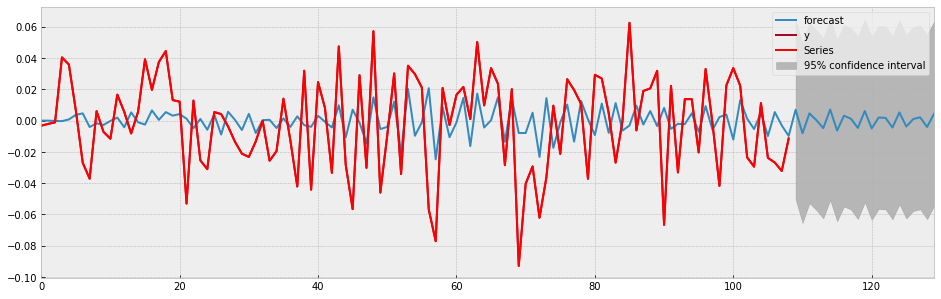

In [6]:
with plt.style.context('bmh'):
    plt.figure(figsize=(16,5))
    ax = plt.axes()
    mdl.plot_predict(0, len(series)+20, ax=ax)
    plt.plot(series, color='red', label='Series')
    plt.legend()
    plt.show()

In [7]:
aic, order, mdl = _get_best_model(series)

/home/levprilutsky/anaconda3/lib/python3.7/site-packages/statsmodels/base/model.py:492: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
/home/levprilutsky/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/tsatools.py:668: RuntimeWarning: overflow encountered in exp
  newparams = ((1-np.exp(-params))/(1+np.exp(-params))).copy()
/home/levprilutsky/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/tsatools.py:668: RuntimeWarning: invalid value encountered in true_divide
  newparams = ((1-np.exp(-params))/(1+np.exp(-params))).copy()
/home/levprilutsky/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/tsatools.py:669: RuntimeWarning: overflow encountered in exp
  tmp = ((1-np.exp(-params))/(1+np.exp(-params))).copy()
/home/levprilutsky/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/tsatools.py:669: RuntimeWarning: invalid value encountered in true_divide
  tmp = ((1-np.exp(-params))/(1+np.exp(-param

aic: -448.39808 | order: (3, 0, 2)


/home/levprilutsky/anaconda3/lib/python3.7/site-packages/statsmodels/base/model.py:492: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)


Results of Dickey-Fuller Test:
Test Statistic                -1.035123e+01
p-value                        2.533629e-18
#Lags Used                     0.000000e+00
Number of Observations Used    1.080000e+02
Critical Value (1%)           -3.492401e+00
Critical Value (5%)           -2.888697e+00
Critical Value (10%)          -2.581255e+00
dtype: float64


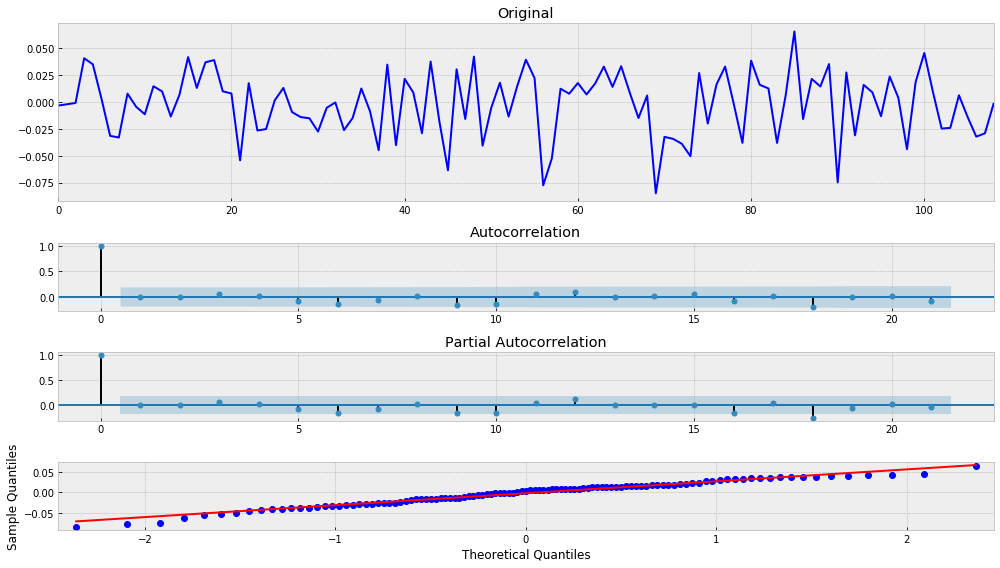

In [8]:
tsplot(mdl.resid)

#### ARIMA

In [9]:
p_ = order[0]
o_ = order[1]
q_ = order[2]

# Using student T distribution usually provides better fit
am = arch_model(series, p=p_, o=o_, q=q_, dist='StudentsT')
res = am.fit(update_freq=5)
print(res.summary())

Iteration:      5,   Func. Count:     68,   Neg. LLF: -225.38191154475714
Iteration:     10,   Func. Count:    129,   Neg. LLF: -225.6461541612468
Iteration:     15,   Func. Count:    183,   Neg. LLF: -226.37418022786275
Iteration:     20,   Func. Count:    235,   Neg. LLF: -226.55827420932988
Iteration:     25,   Func. Count:    288,   Neg. LLF: -226.63204560567632
Iteration:     30,   Func. Count:    340,   Neg. LLF: -226.6747918277013
Iteration:     35,   Func. Count:    394,   Neg. LLF: -226.6769098041031
Iteration:     40,   Func. Count:    445,   Neg. LLF: -226.67780946381234
Optimization terminated successfully.    (Exit mode 0)
            Current function value: -226.67794819013284
            Iterations: 44
            Function evaluations: 486
            Gradient evaluations: 43
                        Constant Mean - GARCH Model Results                         
Dep. Variable:                            y   R-squared:                      -0.000
Mean Model:                 

/home/levprilutsky/anaconda3/lib/python3.7/site-packages/arch/univariate/base.py:293: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.0009364. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 100 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  data_scale_warning.format(orig_scale, rescale), DataScaleWarning


Results of Dickey-Fuller Test:
Test Statistic                  -4.933719
p-value                          0.000030
#Lags Used                       5.000000
Number of Observations Used    103.000000
Critical Value (1%)             -3.495493
Critical Value (5%)             -2.890037
Critical Value (10%)            -2.581971
dtype: float64


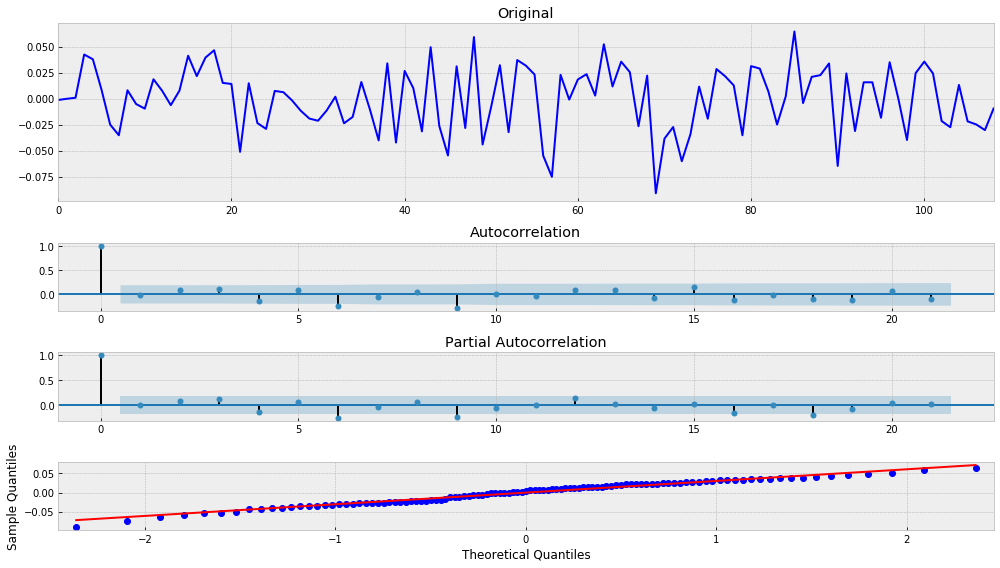

In [10]:
tsplot(res.resid)

#### GARCH

In [11]:
mdl = smt.AR(series).fit(maxlag=30, ic='aic', trend='nc')
est_order = smt.AR(series).select_order(maxlag=30, ic='aic', trend='nc')

am = arch_model(series, p=p_, o=o_, q=q_, dist='StudentsT')
res = am.fit(update_freq=5)
print(res.summary())

Iteration:      5,   Func. Count:     68,   Neg. LLF: -225.38191154475714
Iteration:     10,   Func. Count:    129,   Neg. LLF: -225.6461541612468
Iteration:     15,   Func. Count:    183,   Neg. LLF: -226.37418022786275
Iteration:     20,   Func. Count:    235,   Neg. LLF: -226.55827420932988
Iteration:     25,   Func. Count:    288,   Neg. LLF: -226.63204560567632
Iteration:     30,   Func. Count:    340,   Neg. LLF: -226.6747918277013
Iteration:     35,   Func. Count:    394,   Neg. LLF: -226.6769098041031
Iteration:     40,   Func. Count:    445,   Neg. LLF: -226.67780946381234
Optimization terminated successfully.    (Exit mode 0)
            Current function value: -226.67794819013284
            Iterations: 44
            Function evaluations: 486
            Gradient evaluations: 43
                        Constant Mean - GARCH Model Results                         
Dep. Variable:                            y   R-squared:                      -0.000
Mean Model:                 

/home/levprilutsky/anaconda3/lib/python3.7/site-packages/arch/univariate/base.py:293: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.0009364. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 100 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  data_scale_warning.format(orig_scale, rescale), DataScaleWarning


Results of Dickey-Fuller Test:
Test Statistic                  -4.933719
p-value                          0.000030
#Lags Used                       5.000000
Number of Observations Used    103.000000
Critical Value (1%)             -3.495493
Critical Value (5%)             -2.890037
Critical Value (10%)            -2.581971
dtype: float64


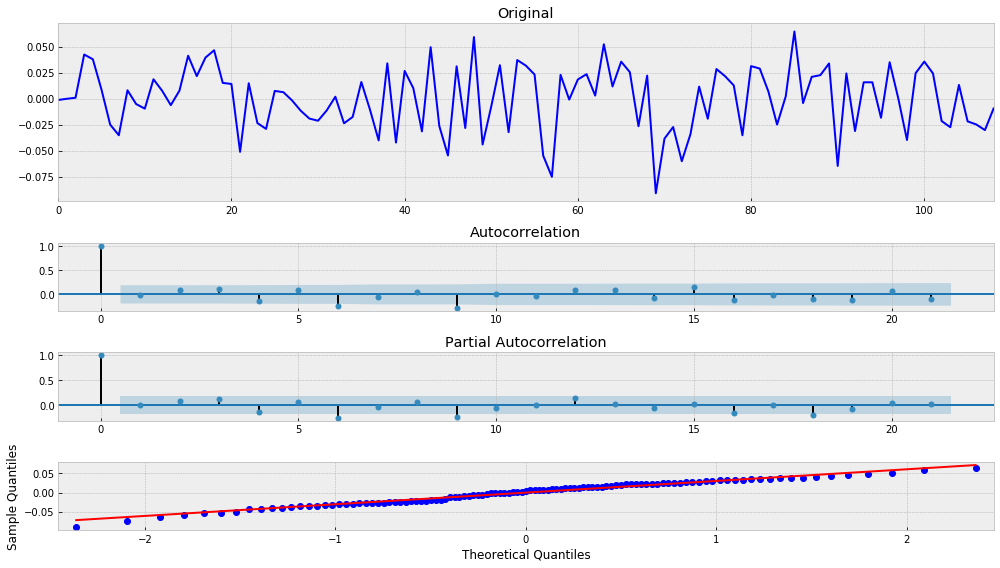

In [12]:
tsplot(res.resid)